# Importando bibliotecas a serem usadas

In [10]:
from PIL import Image 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Visualização da imagem e informações iniciais

Começamos abrindo e visualizando a imagem fornecida

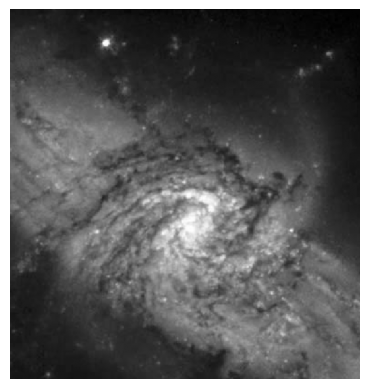

In [11]:
#Utilizando o Image da biblioteca PIL podemos abrir a imagem
image = Image.open("Gabriel Melo - Fig0224(galaxy_pair_original).tif")


#Com o matplotlib conseguimos vê-la na escala de cinza
plt.axis("off")
plt.imshow(image, cmap="gray")
plt.show()

Agora, devemos descobrir informações essenciais da imagem

In [12]:
print("Formato:", image.format)    #Formato do arquivo, podendo ser JPEG, PNG, TIFF...      
print("Canal do formato:",image.mode)    #Representação da imagem, podendo ser RGB, HSV, ou L se em cinza
print("Dimensão:", image.size)         #Largura e Altura da imagem em pixels  

Formato: TIFF
Canal do formato: L
Dimensão: (566, 598)


Vimos que temos uma imagem TIFF em escala de cinza com tamanho 566x598

# Representação matricial e simulação do ruído

Devemos utilizar a função array da biblioteca numpy para representar a imagem como matriz

In [13]:
#Transformamos a imagem em matriz e verificamos seu formato e a matriz em si
im = np.array(image)
print("Dimensão da matriz: ", im.shape)
print("Matriz: ", im)

Dimensão da matriz:  (598, 566)
Matriz:  [[ 41  41  41 ...  22  22  22]
 [ 41  41  41 ...  22  22  22]
 [ 41  41  41 ...  22  22  22]
 ...
 [ 41  41  41 ... 131 128 131]
 [ 41  41  41 ... 128 126 131]
 [ 41  41  41 ... 128 126 131]]


Vamos simular um ruído de imagens obtidas em condições de baixa iluminação com o ruído gaussiano com média zero e desvio padrão de 64 níveis de intensidade. Essas condições podem ser simuladas pela função random.normal da biblioteca numpy

In [14]:
#Utilizamos a função random.normal com os seguintes parâmetros
noise = np.random.normal(loc=0.0, #Centro ou média da distribuição 
                         scale=64, #Desvio padrão da distribuição
                         size=(598, 566) #Formato da saída. No nosso caso escolhemos formato igual ao da imagem fornecida
                         )

Vamos escrever uma função que gere um número 'k' de imagens ruidosas diferentes

In [15]:
def noisy_image_generator(im, k):
    #Criamos uma lista vazia onde armazenaremos as imagens ruidosas
    images_with_noise = []

    #Simularemos 'k' ruídos diferentes e os somamos a imagem. Armazenamos cada resultado na lista images_with_noise
    #Vale ressaltar que cada iteração gera um "noise" diferente por causa da natureza aleatória da função random.normal
    for i in range(k):
        noise = np.random.normal(loc=0.0, scale=64, size=(im.shape))
        noisy_image = im + noise
        images_with_noise.append(noisy_image)

    #Retornaremos a lista de 'k' imagens ruidosas
    return images_with_noise

Escrevemos, agora, a função que calcule de fato a média de imagens:

In [16]:
def image_mean(images):
    #Começamos definindo quantas imagens teremos e armazenamos em 'k'
    k = len(images)
    
    #Faremos uma soma cumulativa das imagens ruidosas
    sum = 0
    for i in range(k):
        sum += images[i]

    #Por fim dividimos a soma por 'k', obtendo a média.
    image_mean = sum / k

    #Retornamos o resultado do cálculo
    return image_mean

Podemos visualizar, por curiosidade, como o ruído afeta a imagem original visualizando-a ao lado da imagem ruidosa:

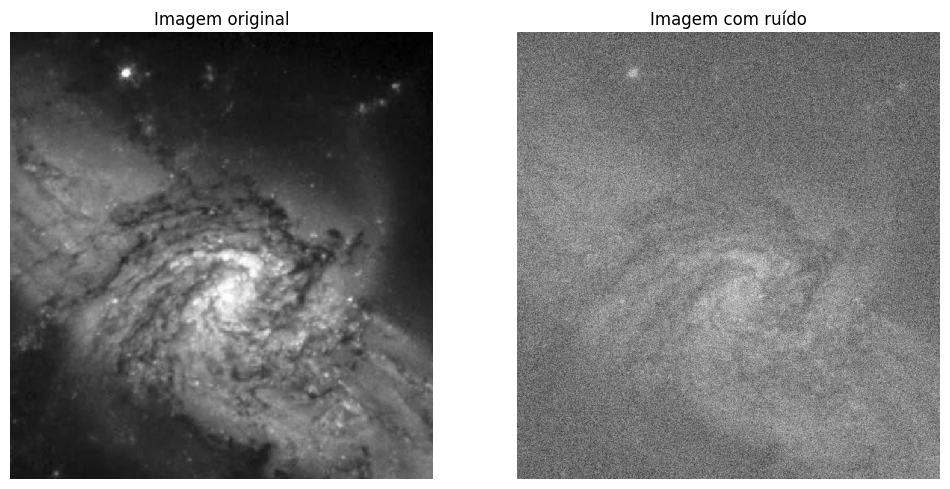

In [17]:
#Começamos gerando uma só imagem
bad_image = noisy_image_generator(im, 1)

#Criamos a figura e adicionamos os subplots como as imagens originais e a ruidosa
fig = plt.figure(figsize=(12,8))
plt.subplot(121); plt.axis("off"); plt.imshow(image, cmap="gray"); plt.title("Imagem original")
plt.subplot(122); plt.axis("off"); plt.imshow(bad_image[0], cmap="gray"); plt.title("Imagem com ruído")
plt.show()

Vimos que o ruído faz com que detalhes importantes da imagem sejam perdidos. Agora, veremos como o cálculo da média de diferentes números de imagens ruidosas pode mitigar os efeitos do ruído:

Escolhemos, como o livro, os valores de k = 5, 10, 20, 50, 100 e os veremos ao lado de uma imagem ruidosa 

In [ ]:
#Começamos criando uma lista com os diferentes valores de 'k'
K_s = [5, 10, 20, 50, 100]
#Criamos a figura e as imagens a serem plotadas
fig, axs = plt.subplots(2,3, figsize=(14,8))

#Para cada valor de 'k' geraremos 'k' imagens com a função noisy_image_generator e então geramos a imagem filtrada com image_mean
#Além disso, adicionamos uma lógica para expor as imagens em formato de grade com base no valor do índice do 'k' da vez
for k in K_s:
    index = K_s.index(k)
    images = noisy_image_generator(im, k)
    mean_image = image_mean(images)
    axs[0, 0].imshow(bad_image[0], cmap='gray'); axs[0,0].axis("off"); axs[0,0].set_title("Imagem com ruído")

    if index <= 1:
        i = 0
        j = index+1

    else:
        i = 1
        j = index-2

    axs[i, j].imshow(mean_image, cmap='gray'); axs[i, j].axis("off"); axs[i, j].set_title(f"Média de {k} imagens") 


Podemos ver que à medida que adicionamos mais imagens no cálculo da média o ruído se torna mais imperceptível. 